<a href="https://colab.research.google.com/github/sivakumargurram/Linear-regression/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Libraries** 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# **Importing Data**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/GitHub/Linear_Regression_Data.csv')

# Check for Null Values

In [3]:
data.isnull().sum()

Age                                         0
Average Yearly Spent on Medical Expenses    0
dtype: int64

## Descriptive Stats

In [4]:
data.head()

,Age,Average Yearly Spent on Medical Expenses
0,15,5000
1,20,7000
2,25,10000
3,30,14000
4,35,23000


In [5]:
data.tail()

,Age,Average Yearly Spent on Medical Expenses
11,70,45000
12,75,50000
13,80,54000
14,85,60000
15,90,75000


In [6]:
data.describe()

,Age,Average Yearly Spent on Medical Expenses
count,16.000000,16.000000
mean,52.500000,33812.500000
std,23.804761,19893.780435
min,15.000000,5000.000000
25%,33.750000,20750.000000
50%,52.500000,33500.000000
75%,71.250000,46250.000000
max,90.000000,75000.000000


## Data Visualization

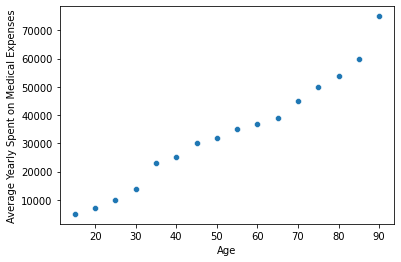

In [7]:
sns.scatterplot(x=data['Age'], y=data['Average Yearly Spent on Medical Expenses'])

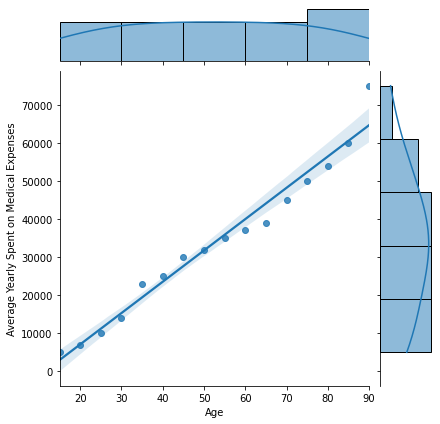

In [8]:
sns.jointplot(x='Age', y= 'Average Yearly Spent on Medical Expenses', data=data, kind='reg')

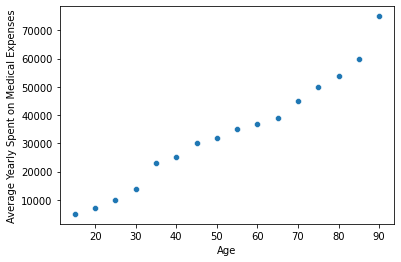

In [9]:
sns.scatterplot(x=data['Age'], y=data['Average Yearly Spent on Medical Expenses'])

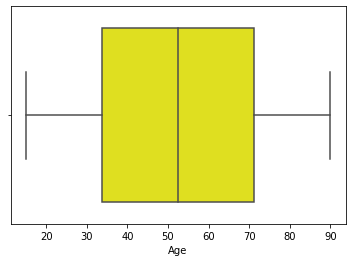

In [10]:
sns.boxplot(x=data['Age'], color='yellow')

# Segregating X & Y variables

In [11]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [12]:
x

array([[15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50],
       [55],
       [60],
       [65],
       [70],
       [75],
       [80],
       [85],
       [90]])

In [13]:
y

array([ 5000,  7000, 10000, 14000, 23000, 25000, 30000, 32000, 35000,
       37000, 39000, 45000, 50000, 54000, 60000, 75000])

# Test and Train Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 1)
(4, 1)
(12, 1)
(4, 1)


# Linear Regression Model Deployment on Training Set

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
x_test

array([[15],
       [20],
       [40],
       [85]])

In [20]:
y_test

array([[ 5000],
       [ 7000],
       [25000],
       [60000]])

# Prediciting Test Results

In [21]:
pred=lr.predict(x_test)

# Model Visualization on Training Data

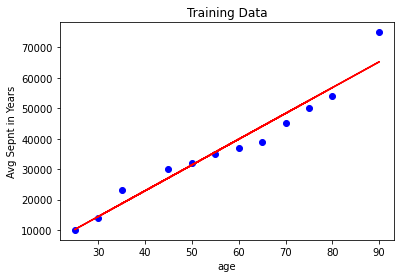

In [22]:
plt.scatter(x_train,y_train, color='blue')
plt.plot(x_train, lr.predict(x_train), color='red')
plt.title('Training Data')
plt.xlabel('age')
plt.ylabel('Avg Sepnt in Years')
plt.show()

# Model Visualization on Test Data

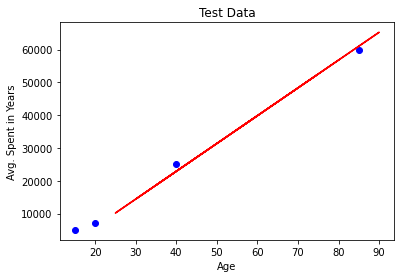

In [23]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_train, lr.predict(x_train), color='red')
plt.title('Test Data')
plt.xlabel('Age')
plt.ylabel('Avg. Spent in Years')
plt.show()

# Model Evaluation (Linear Metrics)

In [24]:
from sklearn import metrics

In [25]:
print(lr.coef_)

[[848.01444043]]


In [26]:
print(lr.intercept_)

[-11054.15162455]


In [27]:
metrics.mean_absolute_error(y_test, pred)

1897.1119133573925

In [28]:
metrics.mean_squared_error(y_test, pred)

4479670.333250757

In [29]:
metrics.r2_score(y_test, pred)

0.9907955919696915

# Predicting Avg. Medical Expenses for Different Age's

In [30]:
lr.predict([[22]])

array([[7602.16606498]])

In [31]:
lr.predict([[33]])

array([[16930.32490975]])